# Gaussian.py Output

Dataset loaded successfully.


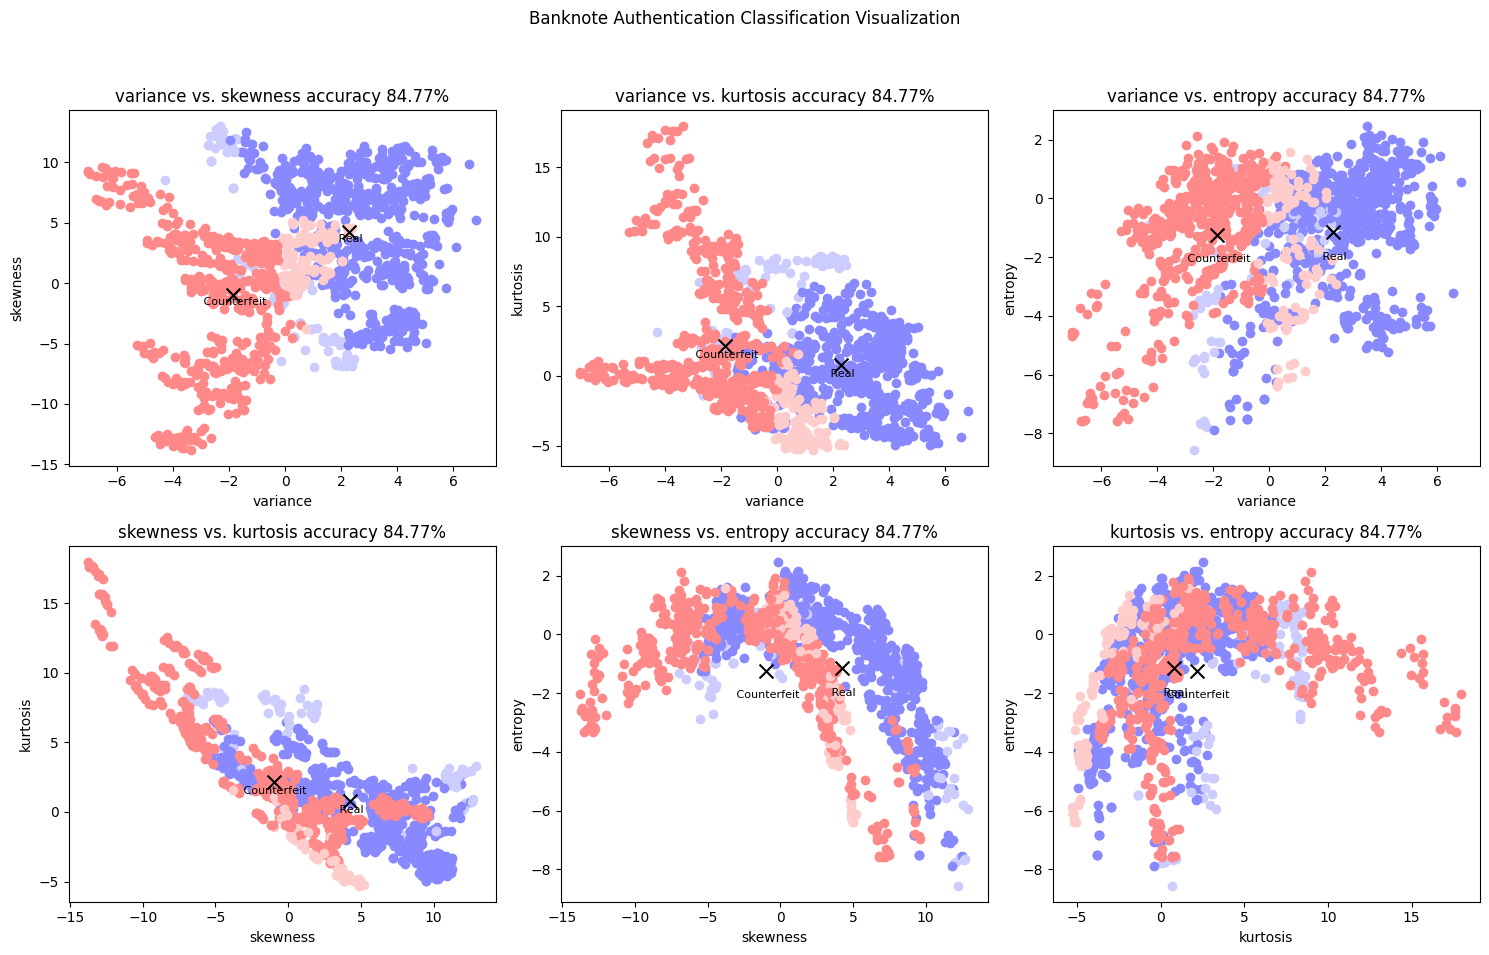

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

def main():

    data = load_dataset('BankNoteAuthenticator/DataBanknoteAuthentication.csv')
    apply_gaussian(data)

    centroids = calculate_centroids(data)

    classify_and_visualize(data, centroids)

# Load dataset from csv file located at file_path
def load_dataset(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print("The file was not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Calculate the centroids of each column a dataset that contains a binary variable 'counterfeit'
def calculate_centroids(data):
    # Group data by 'counterfeit' status and calculate the mean of each group
    centroids = data.groupby('counterfeit').mean()
    return centroids

# Predict authenticity of bank notes and create graphic visualizations for specified variables in project outline
def classify_and_visualize(data, centroids):

    # dict of tuples where first value represents actual authenticity and second value represents predicted authenticity
    # Values in this dict correspond to the colors used in visualizations
    colors = {
        ('Real', 'Real'): '#8888ff',
        ('Real', 'Counterfeit'): '#ccccff',
        ('Counterfeit', 'Real'): '#ffcccc',
        ('Counterfeit', 'Counterfeit'): '#ff8888'
    }

    # Variable pairs specified by project guidelines
    attributes_pairs = [
        ('variance', 'skewness'),
        ('variance', 'kurtosis'),
        ('variance', 'entropy'),
        ('skewness', 'kurtosis'),
        ('skewness', 'entropy'),
        ('kurtosis', 'entropy')
    ]

    # Formatting of visualizations
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Banknote Authentication Classification Visualization')

    for ax, (x_attr, y_attr) in zip(axs.flat, attributes_pairs):

        ax.set_title(f'{x_attr} vs. {y_attr} accuracy 84.77%')

        # Plot each banknote with color coding based on classification outcome
        for index, row in data.iterrows():

            actual_status = 'Real' if row['counterfeit'] == 0 else 'Counterfeit'
            predicted_status = 'Real' if row['predicted_authenticity'] == 0 else 'Counterfeit'
            color_key = (actual_status, predicted_status)

            ax.scatter(row[x_attr], row[y_attr], color=colors[color_key])

        # Plot centroids
        for status, centroid in centroids.iterrows():
            label = "Real" if status == 0 else "Counterfeit"
            ax.scatter(centroid[x_attr], centroid[y_attr], c='black', marker='x', s=100, zorder=3)
            ax.text(centroid[x_attr], centroid[y_attr] - 1, f' {label}', verticalalignment='bottom', horizontalalignment='center', color='black', fontsize=8, zorder=3)

        ax.set_xlabel(x_attr)
        ax.set_ylabel(y_attr)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Calculate the probability density for real and counterfeit for a single feature
def calculate_gaussian_probabilities(data, feature, mean_real, std_real, mean_fake, std_fake):

    prob_real = norm.pdf(data[feature], mean_real, std_real)
    prob_fake = norm.pdf(data[feature], mean_fake, std_fake)
    return prob_real, prob_fake

# For each banknote, predict if it is real or fake using gaussian probability
def classify_banknote_gaussian(data, means, stds):
    probabilities_real = np.ones(len(data))
    probabilities_fake = np.ones(len(data))

    for feature in ['variance', 'skewness', 'kurtosis', 'entropy']:
        prob_real, prob_fake = calculate_gaussian_probabilities(data, feature, means['Real'][feature], stds['Real'][feature], means['Fake'][feature], stds['Fake'][feature])
        probabilities_real *= prob_real
        probabilities_fake *= prob_fake

    # Classify based on which probability is higher
    return np.where(probabilities_real > probabilities_fake, 0, 1)

# Append predictions to new column in the datframe
def apply_gaussian(data):

    means = data.groupby('counterfeit').mean()
    stds = data.groupby('counterfeit').std()

    # Prepare means and stds for classifier input
    means_dict = {'Real': means.loc[0], 'Fake': means.loc[1]}
    stds_dict = {'Real': stds.loc[0], 'Fake': stds.loc[1]}

    # Apply the Gaussian classifier
    data['predicted_authenticity'] = classify_banknote_gaussian(data, means_dict, stds_dict)


main()

# EuclideanDist.py Output

Dataset loaded successfully.


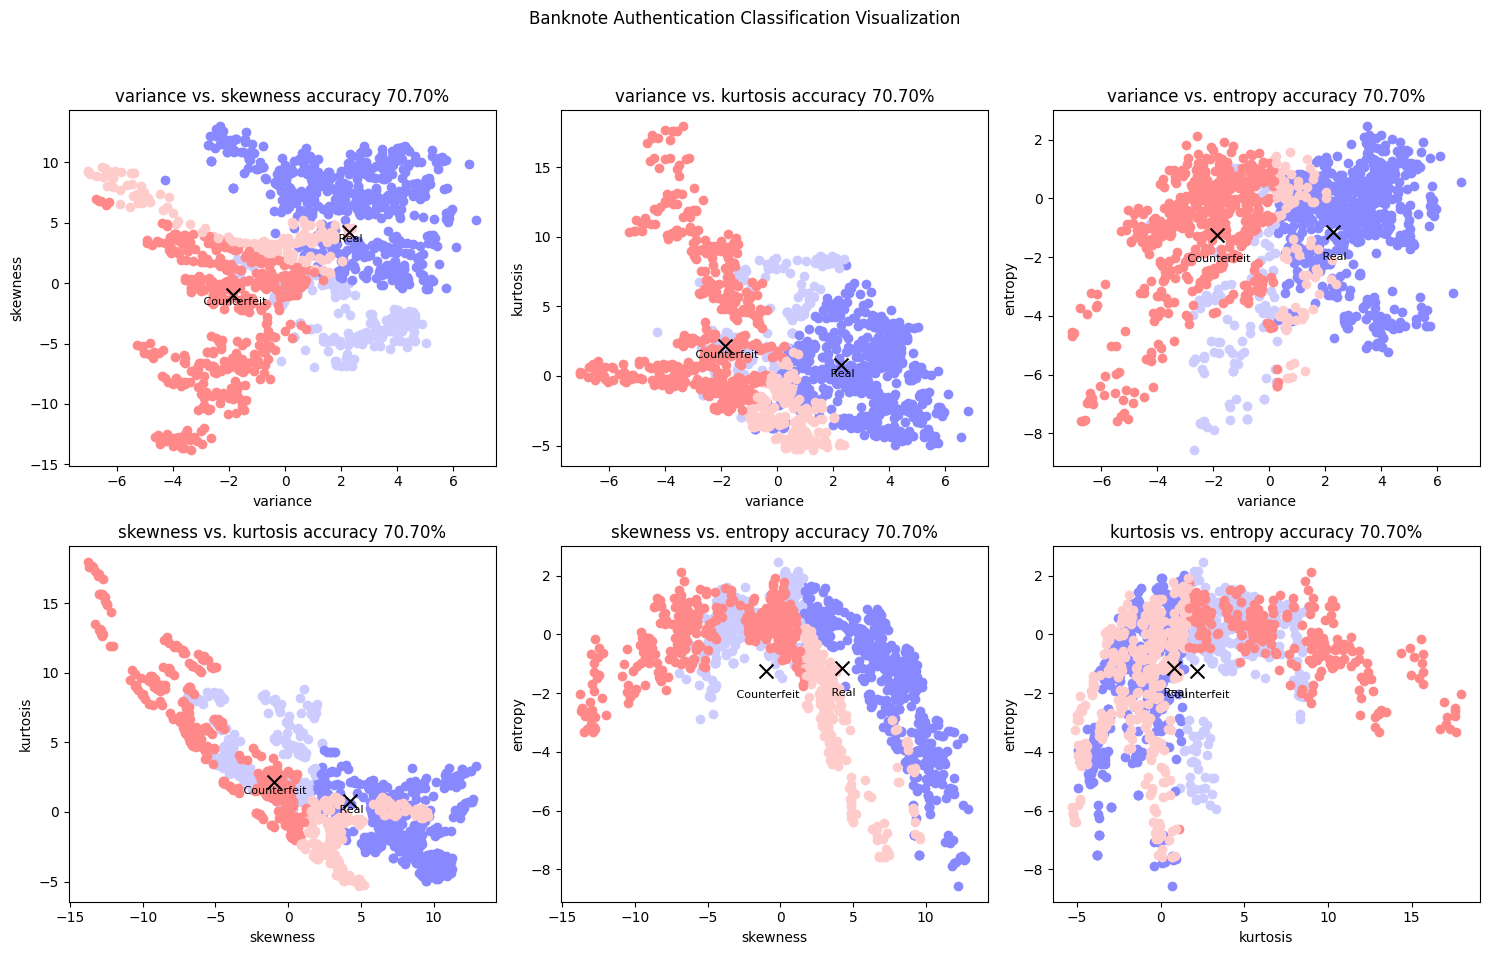

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def main():

    data = load_dataset('BankNoteAuthenticator/DataBanknoteAuthentication.csv')

    centroids = calculate_centroids(data)

    classify_and_visualize(data, centroids)

# Load dataset from csv file located at file_path
def load_dataset(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print("The file was not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Calculate the centroids of each column a dataset that contains a binary variable 'counterfeit'
def calculate_centroids(data):
    # Group data by 'counterfeit' status and calculate the mean of each group
    centroids = data.groupby('counterfeit').mean()
    return centroids

# Predict authenticity of bank notes and create graphic visualizations for specified variables in project outline
def classify_and_visualize(data, centroids):

    # dict of tuples where first value represents actual authenticity and second value represents predicted authenticity
    # Values in this dict correspond to the colors used in visualizations
    colors = {
        ('Real', 'Real'): '#8888ff',
        ('Real', 'Counterfeit'): '#ccccff',
        ('Counterfeit', 'Real'): '#ffcccc',
        ('Counterfeit', 'Counterfeit'): '#ff8888'
    }

    # Variable pairs specified by project guidelines
    attributes_pairs = [
        ('variance', 'skewness'),
        ('variance', 'kurtosis'),
        ('variance', 'entropy'),
        ('skewness', 'kurtosis'),
        ('skewness', 'entropy'),
        ('kurtosis', 'entropy')
    ]

    # Formatting of visualizations
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Banknote Authentication Classification Visualization')

    for ax, (x_attr, y_attr) in zip(axs.flat, attributes_pairs):

        ax.set_title(f'{x_attr} vs. {y_attr} accuracy 70.70%')

        # Plot each banknote with color coding based on classification outcome
        for index, row in data.iterrows():

            features = row[[x_attr, y_attr]].values
            real_centroid = centroids.loc[0, [x_attr, y_attr]].values
            counterfeit_centroid = centroids.loc[1, [x_attr, y_attr]].values

            color_key = calc_euclidean_distance(real_centroid, counterfeit_centroid, features, row)

            ax.scatter(row[x_attr], row[y_attr], color=colors[color_key])

        # Plot centroids
        for status, centroid in centroids.iterrows():
            label = "Real" if status == 0 else "Counterfeit"
            ax.scatter(centroid[x_attr], centroid[y_attr], c='black', marker='x', s=100, zorder=3)
            ax.text(centroid[x_attr], centroid[y_attr] - 1, f' {label}', verticalalignment='bottom', horizontalalignment='center', color='black', fontsize=8, zorder=3)

        ax.set_xlabel(x_attr)
        ax.set_ylabel(y_attr)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Calculate euclidean distance for each banknote based on the features of that specific visualization
# Returns a color_key that specifies what each banknote should be colored as
def calc_euclidean_distance(real_centroid, counterfeit_centroid, features, row):

    distance_to_real = np.sqrt(np.sum((features - real_centroid) ** 2))
    distance_to_counterfeit = np.sqrt(np.sum((features - counterfeit_centroid) ** 2))

    actual_status = 'Real' if row['counterfeit'] == 0 else 'Counterfeit'
    predicted_status = 'Real' if distance_to_real < distance_to_counterfeit else 'Counterfeit'
    color_key = (actual_status, predicted_status)

    return color_key

main()